<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np

import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})  # 19 de septiembre de 2022. Actualización del tamaño de la fuente en títulos y ejes de figuras.

# Soporte para funciones de la librería scipy
from scipy import signal
from scipy import misc

# 14 de septiembre de 2022 - Soporte para métricas SSIM y MSE
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.util import random_noise   # 19 de septiembre de 2022. Actualización para utilizar función que aplica ruido sal y pimienta. 

# salt and pepper
from skimage.util import random_noise

Se utilizará la función para calcular el histograma.

In [ ]:
# INICIO - función
def fnHistograma(inputIm):
 vHistograma = np.zeros((1,256))
 pixelRange = range(0,255)                                  # Para calcular desde la función, el vector con elementos para el eje x.
 valsPixel = np.arange(256)

 for pixelValue in pixelRange:  
  vHistograma[0,pixelValue] = (inputIm == pixelValue).sum() # https://aarsh.dev/2017/10/15/python-numpy-count-elements/  


 vHistograma = list(vHistograma.flatten())                  # El histograma se convierte a un archivo de tipo lista. OJo que va por fuera del ciclo FOR. 
                                                            # Fuente: https://stackoverflow.com/questions/1966207/convert-numpy-array-to-python-list
 return vHistograma,valsPixel


Enlazar Google Drive y cargar imagen en variable.

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
imagenEnt = cv2.imread('/content/drive/MyDrive/vision_artificial/images/HCColor1.jpg',cv2.IMREAD_GRAYSCALE) 
nf,nc = imagenEnt.shape 
imagenEnt = imagenEnt.astype(np.float64) # Debido a que se utilizará covolución, que puede producir matrices con punto decimal, se cambia la precisión admisible en los píxeles de las imágenes.

Evaluar el efecto que tienen diferentes tipos de ruido, en la información visual de una imagen. Información de referencia: https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook

En un primer caso se considera la adición de ruido Gaussiano, denominado así porque su función de distribución de probabilidad se asemeja a una función Gaussiana. Para visualizar esta distribución, utilizar la función fnHistograma.

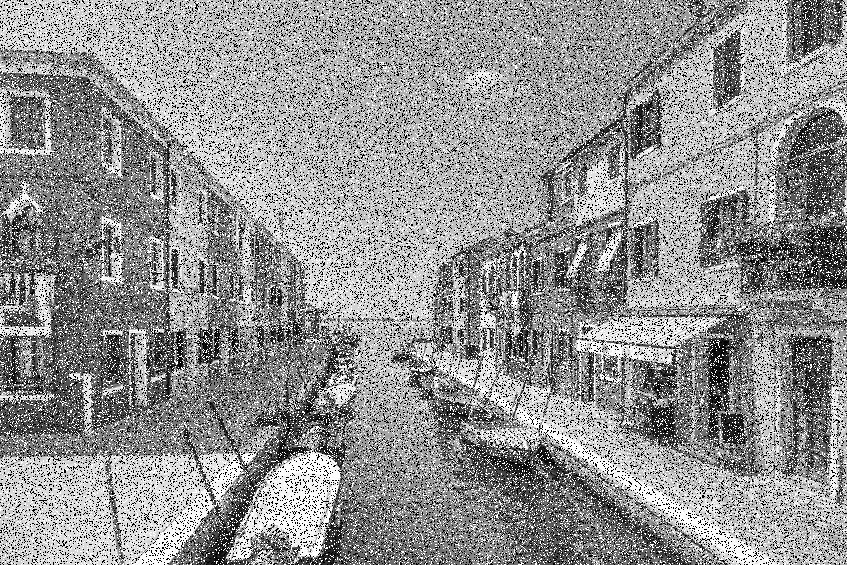

-1

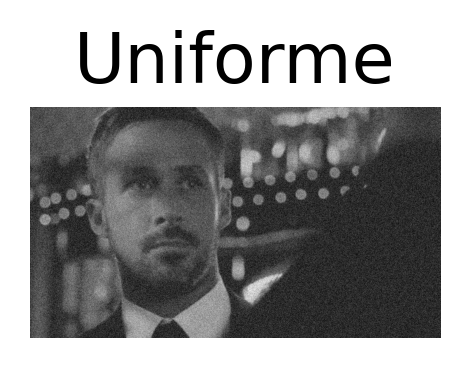

In [ ]:
# (a.) Generación de imagen que es solo un patrón de ruido Gaussiano
gauss_noise=np.zeros((nf,nc),dtype=np.float64) # Se asigna precisión float64 porque se aplicará luego convolución.
cv2.randn(gauss_noise,50,10)                   # Acá se especifican el valor promedio de los píxeles en la imagen de ruido, y también su desviación estándar.
                                              
gauss_noise.astype(np.float64)

# Se agrega ruido a la imagen original.
imagenRuido = cv2.add(imagenEnt,gauss_noise)

gauss_noiseHist = gauss_noise                      # Copia de la imagen con patrón de ruido. Justo debajo, se convierte a tipo uint8 para calcular su histograma.
gauss_noiseHist = gauss_noiseHist.astype(np.uint8) 
histRuido,vecPixels = fnHistograma(gauss_noiseHist)

# (b.) Generación de imagen que es solo un patrón de ruido uniforme. 
# Utilizar función randu. ¿Qué representan el segundo y tercer argumento de entrada de la función?
uni_noise=np.zeros((nf,nc),dtype=np.float64)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.float64)

un_img=cv2.add(imagenEnt,uni_noise)

fig=plt.figure(dpi=300)

fig.add_subplot(1,3,3)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Uniforme")


# (c.) Generación de imagen que es solo un patrón de ruido sal y pimienta.
# Considerar la estrategia en: https://theailearner.com/2019/05/07/add-different-noise-to-an-image/
# Tener en cuenta cuales figuras del subplot ya no estarían disponibles.
img = cv2.imread("/content/drive/MyDrive/vision_artificial/images/HCColor2.jpg",cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Display the noise image
cv2_imshow(noise_img)
cv2.waitKey(0)


Text(0.5, 1.0, 'Imagen + ruido.')

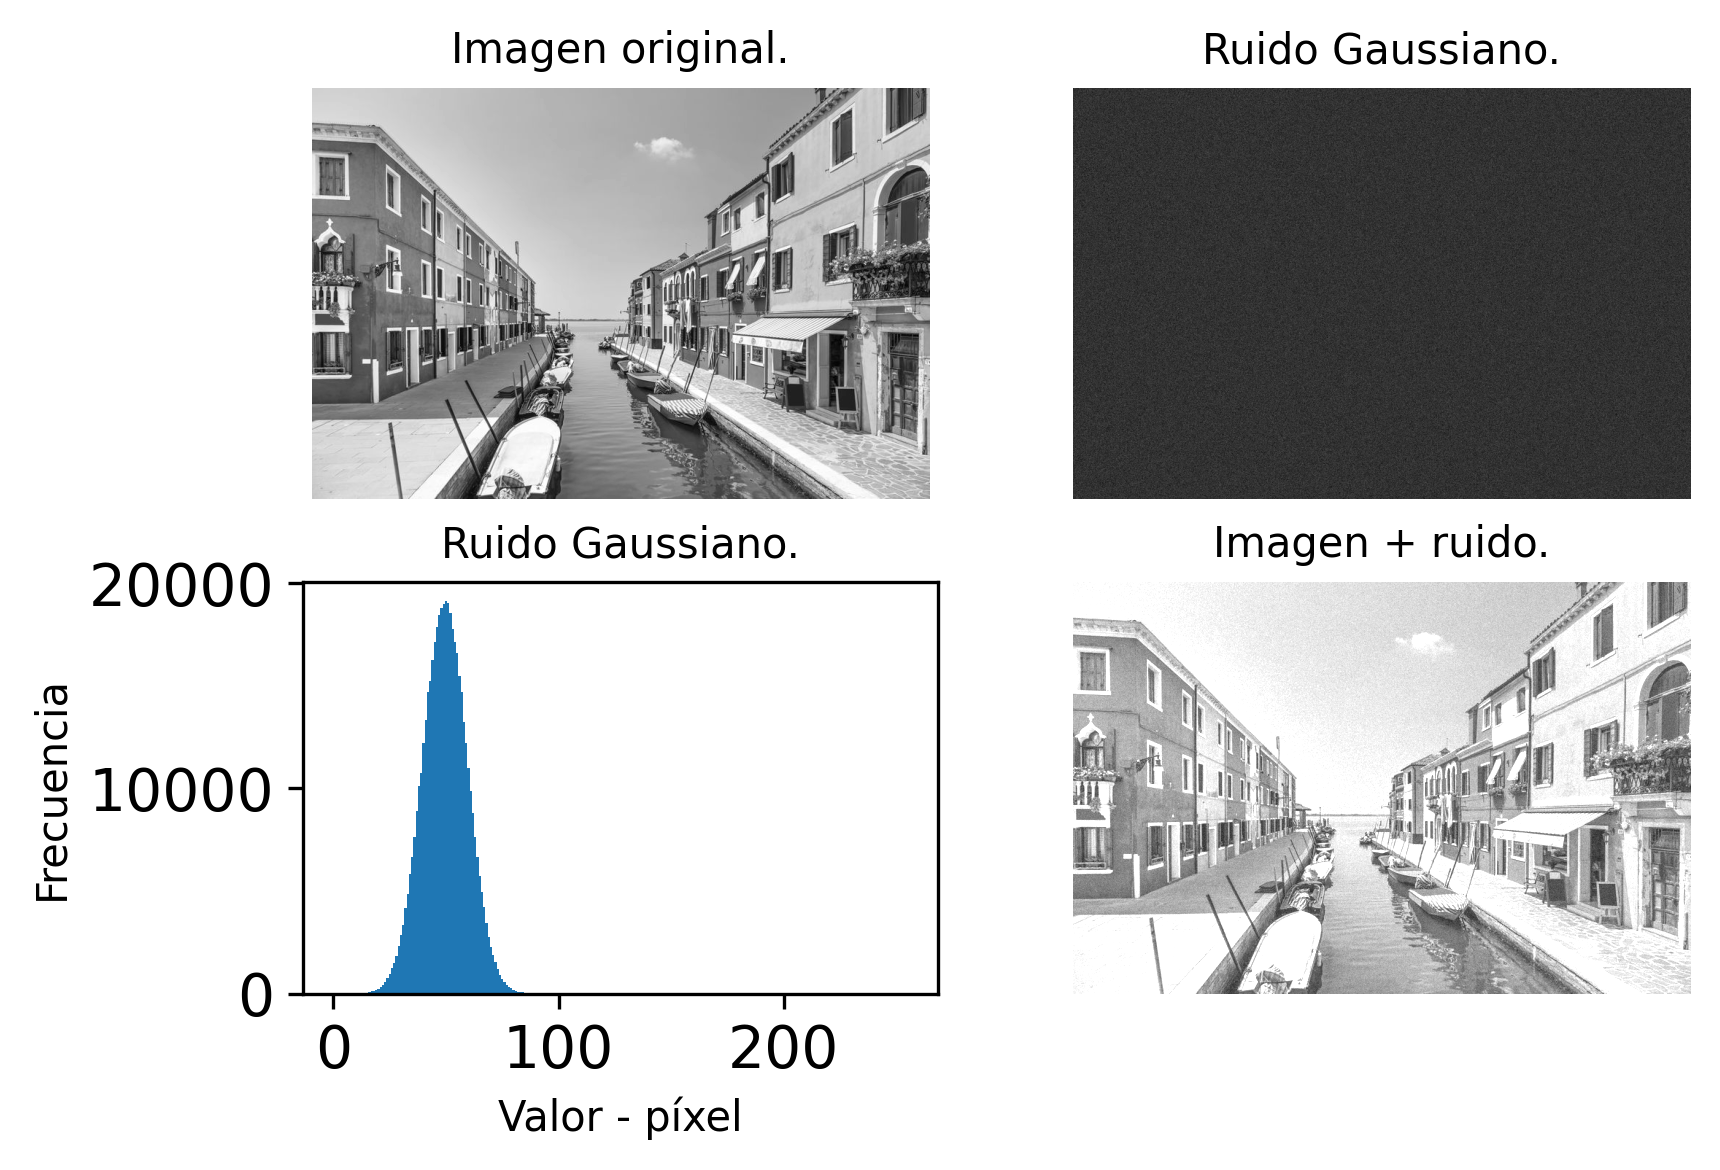

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(2,2,1)
plt.imshow(imagenEnt, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.title("Imagen original.", fontsize = 10)

fig.add_subplot(2,2,2)                         
plt.imshow(gauss_noise,cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Ruido Gaussiano.", fontsize = 10)

fig.add_subplot(2,2,3)                         # La tercera visualización del subplot es un diagrama de barras con el histograma del patrón de ruido.
plt.bar(vecPixels,histRuido, align='center',width = 1)
plt.xlabel("Valor - píxel", fontsize = 10)     # Referencia de esta línea y la siguiente: https://www.w3schools.com/Python/matplotlib_labels.asp
plt.ylabel("Frecuencia", fontsize = 10)
plt.title("Ruido Gaussiano.", fontsize = 10)


fig.add_subplot(2,2,4)
plt.imshow(imagenRuido,cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title("Imagen + ruido.", fontsize = 10)

